In [1]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.3.1
asttokens               3.0.1
astunparse              1.6.3
certifi                 2026.1.4
charset-normalizer      3.4.4
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.19
decorator               5.2.1
executing               2.2.1
flatbuffers             25.12.19
fonttools               4.61.1
gast                    0.7.0
google-pasta            0.2.0
grpcio                  1.76.0
h5py                    3.15.1
idna                    3.11
ipykernel               7.1.0
ipython                 9.9.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.5.3
jupyter_client          8.8.0
jupyter_core            5.9.1
keras                   3.13.1
kiwisolver              1.4.9
libclang                18.1.1
Markdown                3.10
markdown-it-py      


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ConvNeXtTiny, InceptionV3, InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
# 1. KONFIGURASI GLOBAL
batch_size = 32
epochs = 10
splits_dir = "dataset/splits"

# Define two CSV
tasks = [
    {'name': 'ORI', 'prefix': r"ORI"},
    {'name': 'GLZ', 'prefix': r"GLZ"}
]

# Definisi Model Pre-trained
architectures = [
    {'name': 'InceptionV3', 'func': InceptionV3},
    {'name': 'InceptionResNetV2', 'func': InceptionResNetV2},
    {'name': 'ConvNeXtTiny', 'func': ConvNeXtTiny}
]

all_histories = {}

In [4]:
def save_confusion_matrix_and_report(model, test_gen, run_name):
    test_gen.reset()
    y_pred_probs = model.predict(test_gen, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()
    y_true = test_gen.classes
    
    # 1. Hitung dan Tampilkan Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(test_gen.class_indices.keys()),
                yticklabels=list(test_gen.class_indices.keys()))
    plt.title(f'Confusion Matrix: {run_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'cm_{run_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 2. Hitung Classification Report (Precision, Recall, F1)
    report = classification_report(y_true, y_pred, 
                                   target_names=list(test_gen.class_indices.keys()), 
                                   output_dict=True)
    
    # Tampilkan teks report di console agar bisa Anda lihat saat training
    print(f"\nClassification Report for {run_name}:")
    print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
    
    return report


MEMULAI TUGAS: ORI

--- Training Model: InceptionV3 ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5694 - loss: 14.2734 - val_accuracy: 0.6852 - val_loss: 5.3682 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6713 - loss: 5.7588 - val_accuracy: 0.7778 - val_loss: 1.9376 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7847 - loss: 2.4398 - val_accuracy: 0.7778 - val_loss: 1.1471 - learning_rate: 0.0010
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7778 - loss: 2.5247 - val_accuracy: 0.8704 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8194 - loss: 1.6358 - val_accuracy: 0.8333 - val_loss: 0.5966 - learning_rate: 0.0010
Epoch 6/10
14/

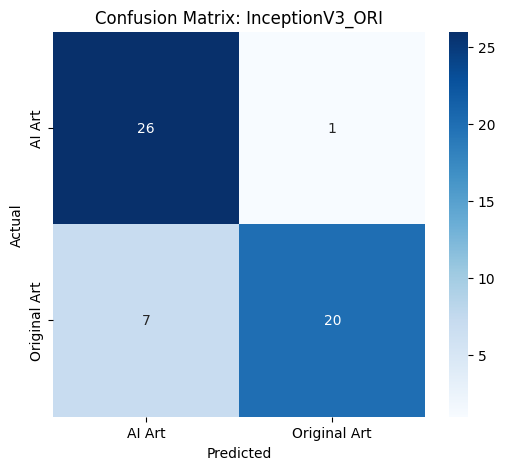


Classification Report for InceptionV3_ORI:
              precision    recall  f1-score   support

      AI Art       0.79      0.96      0.87        27
Original Art       0.95      0.74      0.83        27

    accuracy                           0.85        54
   macro avg       0.87      0.85      0.85        54
weighted avg       0.87      0.85      0.85        54



--- Training Model: InceptionResNetV2 ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.6296 - loss: 12.3617 - val_accuracy: 0.6296 - val_loss: 4.7723 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.6991 - loss: 3.8250 - val_accuracy: 0.8333 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.7801 - loss: 1.9295 - val_accuracy: 0.7593

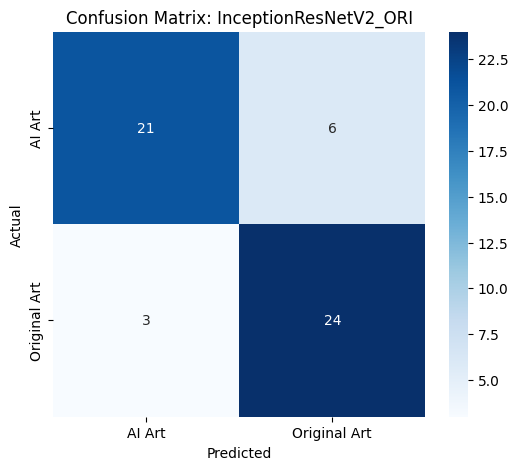


Classification Report for InceptionResNetV2_ORI:
              precision    recall  f1-score   support

      AI Art       0.88      0.78      0.82        27
Original Art       0.80      0.89      0.84        27

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54


--- Training Model: ConvNeXtTiny ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.6644 - loss: 3.0232 - val_accuracy: 0.7778 - val_loss: 1.1618 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.8194 - loss: 1.0330 - val_accuracy: 0.7037 - val_loss: 1.6397 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 88s 6s/step - accuracy: 0.7870 - loss: 0.9595 - val_accuracy: 0.7778 

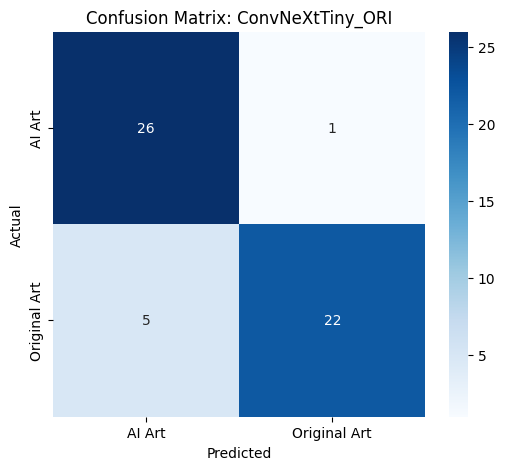


Classification Report for ConvNeXtTiny_ORI:
              precision    recall  f1-score   support

      AI Art       0.84      0.96      0.90        27
Original Art       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54


MEMULAI TUGAS: GLZ

--- Training Model: InceptionV3 ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.5694 - loss: 17.7156 - val_accuracy: 0.5000 - val_loss: 12.3688 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.6852 - loss: 5.9311 - val_accuracy: 0.7222 - val_loss: 2.2372 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7755 - loss: 2.5863 - val_a

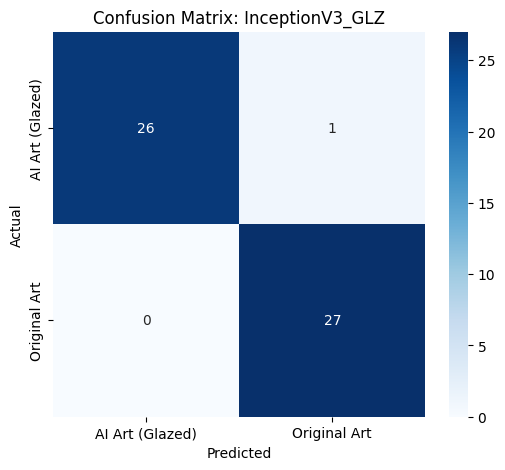


Classification Report for InceptionV3_GLZ:
                 precision    recall  f1-score   support

AI Art (Glazed)       1.00      0.96      0.98        27
   Original Art       0.96      1.00      0.98        27

       accuracy                           0.98        54
      macro avg       0.98      0.98      0.98        54
   weighted avg       0.98      0.98      0.98        54


--- Training Model: InceptionResNetV2 ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.6042 - loss: 9.5451 - val_accuracy: 0.8704 - val_loss: 1.0797 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.7037 - loss: 4.4435 - val_accuracy: 0.8148 - val_loss: 1.3149 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.7963 - loss: 1.7979 - val_

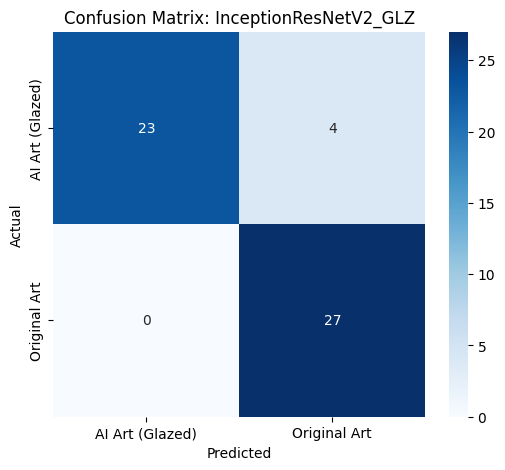


Classification Report for InceptionResNetV2_GLZ:
                 precision    recall  f1-score   support

AI Art (Glazed)       1.00      0.85      0.92        27
   Original Art       0.87      1.00      0.93        27

       accuracy                           0.93        54
      macro avg       0.94      0.93      0.93        54
   weighted avg       0.94      0.93      0.93        54


--- Training Model: ConvNeXtTiny ---
Found 432 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Found 54 validated image filenames belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 98s 7s/step - accuracy: 0.7361 - loss: 2.2576 - val_accuracy: 0.7593 - val_loss: 0.7993 - learning_rate: 0.0010
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step - accuracy: 0.7870 - loss: 1.0494 - val_accuracy: 0.7593 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 88s 6s/step - accuracy: 0.8241 - loss: 0.8288 - val

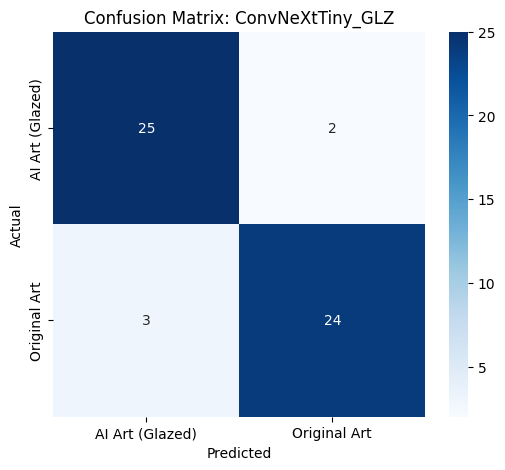


Classification Report for ConvNeXtTiny_GLZ:
                 precision    recall  f1-score   support

AI Art (Glazed)       0.89      0.93      0.91        27
   Original Art       0.92      0.89      0.91        27

       accuracy                           0.91        54
      macro avg       0.91      0.91      0.91        54
   weighted avg       0.91      0.91      0.91        54


Semua proses training selesai dan data telah disimpan!


In [5]:
# 2. NESTED LOOP UNTUK TRAINING OTOMATIS
for task in tasks:
    print(f"\n{'='*30}\nMEMULAI TUGAS: {task['name']}\n{'='*30}")
    
    # Load the specific split CSVs for this experiment
    train_df = pd.read_csv(os.path.join(splits_dir, f"{task['prefix']}_train.csv"))
    valid_df = pd.read_csv(os.path.join(splits_dir, f"{task['prefix']}_valid.csv"))
    test_df = pd.read_csv(os.path.join(splits_dir, f"{task['prefix']}_test.csv"))

    for arch in architectures:
        run_name = f"{arch['name']}_{task['name']}"
        print(f"\n--- Training Model: {arch['name']} ---")
        
        # Inception models require 299, ConvNeXt standard is 224
        target_size = (299, 299) if "Inception" in arch['name'] else (224, 224)
        input_shape = (target_size[0], target_size[1], 3)
        
        # Definisi Augmentation & Generators
        train_datagen = ImageDataGenerator(
        rescale=1./255, 
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
        )
        val_test_datagen = ImageDataGenerator(rescale=1./255)

        train_gen = train_datagen.flow_from_dataframe(
            train_df, x_col='filepath', y_col='label',
            target_size=target_size, class_mode='binary', batch_size=batch_size
        )
        valid_gen = val_test_datagen.flow_from_dataframe(
            valid_df, x_col='filepath', y_col='label',
            target_size=target_size, class_mode='binary', batch_size=batch_size, shuffle=False
        )
        test_gen = val_test_datagen.flow_from_dataframe(
            test_df, x_col='filepath', y_col='label',
            target_size=target_size, class_mode='binary', batch_size=batch_size, shuffle=False
        )
        
        # Build Model
        base_model = arch['func'](include_top=False, weights='imagenet', input_shape=input_shape)
        base_model.trainable = False
        
        x = Flatten()(base_model.output)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(256, activation='relu')(x)
        predictions = Dense(1, activation='sigmoid')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)
        model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
        
        # 4. Training
        history = model.fit(
            train_gen, 
            validation_data=valid_gen, 
            epochs=epochs,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                ModelCheckpoint(f"best_{run_name}.keras", save_best_only=True),
                ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=0.00001,)
            ]
        )

        # 5. Evaluasi model pada data Test
        print('')
        test_loss, test_acc = model.evaluate(test_gen)
        print(f"Hasil Uji Akhir untuk {run_name}: Acc = {test_acc:.4f}")
        # PANGGIL FUNGSI CM & REPORT DI SINI
        metrics_report = save_confusion_matrix_and_report(model, test_gen, run_name)
                
        # 6. Simpan History & Test Accuracy (URUTAN DIPERBAIKI)
        all_histories[run_name] = history.history           # Simpan history dulu
        all_histories[run_name]['test_accuracy'] = test_acc # Baru tambahkan test_acc kedalamnya
        all_histories[run_name]['precision'] = metrics_report['weighted avg']['precision']
        all_histories[run_name]['recall'] = metrics_report['weighted avg']['recall']
        all_histories[run_name]['f1_score'] = metrics_report['weighted avg']['f1-score']
        all_histories[run_name]['full_report'] = metrics_report # Menyimpan seluruh detail
        
        # CLEANUP MEMORI
        tf.keras.backend.clear_session()
        del model, base_model, train_gen, valid_gen, test_gen

        # 3. SIMPAN SEMUA HASIL KE FILE (Agar data tidak hilang jika kernel mati)
        with open('all_training_results.pkl', 'wb') as f:
            pickle.dump(all_histories, f)

print("\nSemua proses training selesai dan data telah disimpan!")

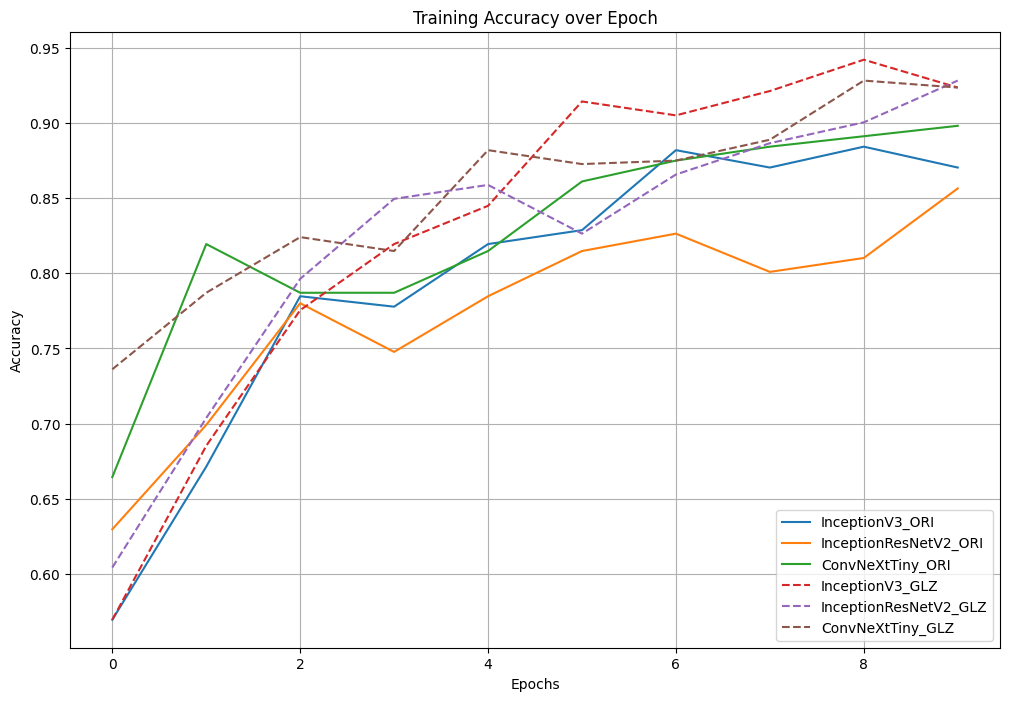

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(12, 8))

for name, hist in all_histories.items():
    # Gunakan garis putus-putus untuk tugas GLZ agar mudah dibedakan
    style = '--' if 'GLZ' in name else '-'
    plt.plot(hist['accuracy'], label=name, linestyle=style)

plt.title('Training Accuracy over Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.savefig('training accuracy over epoch.png', dpi=300)

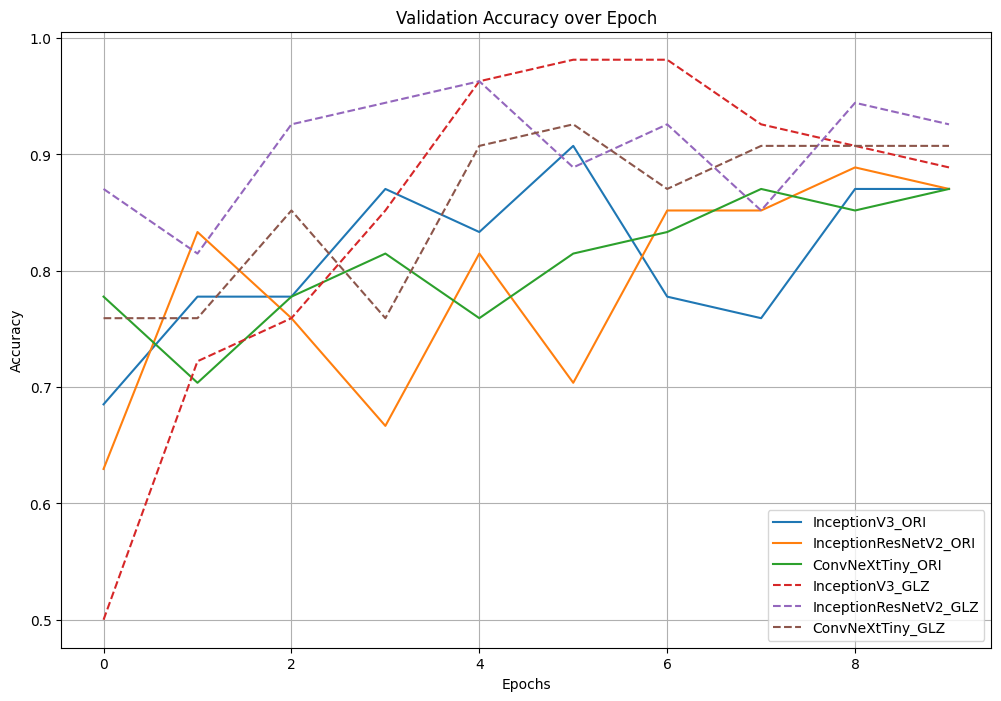

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(12, 8))

for name, hist in all_histories.items():
    # Gunakan garis putus-putus untuk tugas GLZ agar mudah dibedakan
    style = '--' if 'GLZ' in name else '-'
    plt.plot(hist['val_accuracy'], label=name, linestyle=style)

plt.title('Validation Accuracy over Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.savefig('validation accuracy over epoch.png', dpi=300)

In [8]:
# Membuka file hasil training
with open('all_training_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Melihat daftar model yang tersimpan di dalamnya
print("Model yang tersimpan:", results.keys())

Model yang tersimpan: dict_keys(['InceptionV3_ORI', 'InceptionResNetV2_ORI', 'ConvNeXtTiny_ORI', 'InceptionV3_GLZ', 'InceptionResNetV2_GLZ', 'ConvNeXtTiny_GLZ'])


In [9]:
summary_data = []

for name, data in results.items():
    summary_data.append({
        'Model_Task': name,
        'Final_Train_Acc': data['accuracy'][-1], # Ambil epoch terakhir
        'Final_Val_Acc': data['val_accuracy'][-1],
        'Test_Acc': data['test_accuracy']
    })

df_results = pd.DataFrame(summary_data)
print(df_results)

              Model_Task  Final_Train_Acc  Final_Val_Acc  Test_Acc
0        InceptionV3_ORI         0.870370       0.870370  0.851852
1  InceptionResNetV2_ORI         0.856481       0.870370  0.833333
2       ConvNeXtTiny_ORI         0.898148       0.870370  0.888889
3        InceptionV3_GLZ         0.923611       0.888889  0.981481
4  InceptionResNetV2_GLZ         0.928241       0.925926  0.925926
5       ConvNeXtTiny_GLZ         0.923611       0.907407  0.907407


In [ ]:
# 1. Load file hasil training yang sudah diupdate
file_path = 'all_training_results.pkl'

try:
    with open(file_path, 'rb') as f:
        results = pickle.load(f)
    
    summary_list = []

    # 2. Iterasi melalui hasil untuk setiap model
    for run_name, data in results.items():
        # Mengambil metrik dengan nilai default 0 jika kunci tidak ditemukan
        summary_list.append({
            'Model & Task': run_name,
            'Accuracy': data.get('test_accuracy', 0),
            'Precision': data.get('precision', 0),
            'Recall': data.get('recall', 0),
            'F1-Score': data.get('f1_score', 0)
        })

    # 3. Membuat DataFrame dan memformat angka (4 desimal)
    df_summary = pd.DataFrame(summary_list)
    
    # Mengurutkan berdasarkan F1-Score tertinggi untuk melihat model terbaik
    df_summary = df_summary.sort_values(by='F1-Score', ascending=False)

    # Menampilkan tabel yang diformat
    print("="*30)
    print("TABEL RINGKASAN PERFORMA MODEL")
    print("="*30)
    # Gunakan .style untuk mempercantik tampilan di Jupyter jika diinginkan
    display(df_summary.style.format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1-Score': '{:.4f}'
    }))

    # 4. Opsional: Simpan ke file CSV agar bisa dibuka di Excel
    df_summary.to_csv('cm_details.csv', index=False)
    print("\nFile 'cm_details.csv' telah berhasil dibuat.")

except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan proses training sudah selesai.")

In [ ]:
# MODEL_TYPE             F1   /RECALL/ PRECISION
# inceptionv3_ORI        0.85 / 0.85 / 0.87
# inceptionv3_GLZ        0.98 / 0.98 / 0.98
# inceptionresnetv2_ORI  0.83 / 0.83 / 0.84
# inceptionresnetv2_GLZ  0.93 / 0.93 / 0.94
# Cnvnexttiny_ORI        0.89 / 0.89 / 0.90
# Cnvnexttiny_GLZ        0.91 / 0.91 / 0.91